In [1]:
import os
import pandas as pd
from datetime import datetime

In [2]:
# List of your PCORI CDM tables (without the .parquet extension)
TABLES = [
    "condition", "death", "death_cause", "demographic", "diagnosis",
    "dispensing", "encounter", "immunization", "lab_result_cm", "med_admin",
    "obs_clin", "obs_gen", "prescribing", "procedures", "vital"
]

# Dictionary to hold DataFrames loaded from Parquet files
dataframes = {}

# Load each table from the data/ directory
for table in TABLES:
    path = os.path.join("/home/asadr/datasets/stroke_data/", f"{table}.parquet")
    if os.path.exists(path):
        try:
            df = pd.read_parquet(path)
            dataframes[table] = df
            print(f"Loaded {table}.parquet with {len(df)} rows.")
        except Exception as e:
            print(f"Error loading {path}: {e}")
    else:
        print(f"Warning: {path} does not exist.")


Loaded condition.parquet with 284207 rows.
Loaded death.parquet with 3688 rows.
Loaded death_cause.parquet with 0 rows.
Loaded demographic.parquet with 11291 rows.
Loaded diagnosis.parquet with 5873048 rows.
Loaded dispensing.parquet with 3871528 rows.
Loaded encounter.parquet with 685754 rows.
Loaded immunization.parquet with 7704 rows.
Loaded lab_result_cm.parquet with 18344747 rows.
Loaded med_admin.parquet with 7273075 rows.
Loaded obs_clin.parquet with 20741389 rows.
Loaded obs_gen.parquet with 193286 rows.
Loaded prescribing.parquet with 11950062 rows.
Loaded procedures.parquet with 5940270 rows.
Loaded vital.parquet with 3468732 rows.


In [6]:
def get_patient_data(patient_id: str):
    """
    Retrieve patient-specific data from each table based on the PATID field.
    Returns a dictionary with table names as keys and a list of record dicts as values.
    """
    patient_data = {}
    for table, df in dataframes.items():
        if "PATID" in df.columns:
            # Convert PATID to string for safe comparison
            filtered = df[df["PATID"].astype(str) == patient_id]
            if not filtered.empty:
                # Convert rows to a list of dictionaries
                patient_data[table] = filtered.to_dict(orient="records")
    return patient_data

In [7]:
patient_id = 'PSU30395013'
patient_data = get_patient_data(patient_id)

In [8]:
patient_data.keys()

dict_keys(['condition', 'demographic', 'diagnosis', 'dispensing', 'encounter', 'lab_result_cm', 'med_admin', 'obs_clin', 'prescribing', 'procedures', 'vital'])

In [9]:
patient_data['demographic']

[{'PATID': 'PSU30395013',
  'BIRTH_DATE': Timestamp('1952-09-16 00:00:00'),
  'BIRTH_TIME': 0.0,
  'SEX': 'M',
  'SEXUAL_ORIENTATION': 'NI',
  'GENDER_IDENTITY': 'F',
  'HISPANIC': 'N',
  'RACE': '05',
  'BIOBANK_FLAG': 'N',
  'PAT_PREF_LANGUAGE_SPOKEN': 'ENG',
  'RAW_SEX': '429 | Male',
  'RAW_SEXUAL_ORIENTATION': None,
  'RAW_GENDER_IDENTITY': '429 | Male',
  'RAW_HISPANIC': '211134438 | Not Hispanic, Latino, or Spanish Origi',
  'RAW_RACE': '5061 | White',
  'RAW_PAT_PREF_LANGUAGE_SPOKEN': '645 | English',
  'ZIP_CODE': '170',
  'RUCA_CODE': '1.0'}]

In [ ]:
# patient_data['diagnosis']
patids = df_['PATID'].nunique()[:100]

In [4]:
patids = dataframes['demographic']['PATID'].unique()[:100]

for table in TABLES:
    df_ = dataframes[table]
    df_ = df_[df_['PATID'].isin(patids)]
    path = os.path.join("data/", f"{table}.parquet")
    df_.to_parquet(path)
    print(table,df_['PATID'].nunique())

condition 94
death 38
death_cause 0
demographic 100
diagnosis 100
dispensing 90
encounter 100
immunization 34
lab_result_cm 100
med_admin 100
obs_clin 100
obs_gen 9
prescribing 100
procedures 100
vital 100


In [5]:
patids[0]

'PSU30395013'

In [ ]:
icd9s_IS = ['433.01', '433.11', '433.21', '433.31', '433.81', '433.91', '434.01', '434.11', '434.91']

icd10s_IS = [
    'H34.1', 'I63', 'I63.0', 'I63.00', 'I63.01', 'I63.011', 'I63.012', 'I63.013', 'I63.019', 'I63.02', 'I63.03', 'I63.031', 'I63.032', 'I63.033', 'I63.039', 
    'I63.09', 'I63.1', 'I63.10', 'I63.11', 'I63.111', 'I63.112', 'I63.113', 'I63.119', 'I63.12', 'I63.13', 'I63.131', 'I63.132', 'I63.133', 'I63.139', 
    'I63.19', 'I63.2', 'I63.20', 'I63.21', 'I63.211', 'I63.212', 'I63.213', 'I63.219', 'I63.22', 'I63.23', 'I63.231', 'I63.232', 'I63.233', 'I63.239', 
    'I63.29', 'I63.3', 'I63.30', 'I63.31', 'I63.311', 'I63.312', 'I63.313', 'I63.319', 'I63.32', 'I63.321', 'I63.322', 'I63.323', 'I63.329', 'I63.33', 
    'I63.331', 'I63.332', 'I63.333', 'I63.339', 'I63.34', 'I63.341', 'I63.342', 'I63.343', 'I63.349', 'I63.39', 'I63.4', 'I63.40', 'I63.41', 'I63.411', 
    'I63.412', 'I63.413', 'I63.419', 'I63.42', 'I63.421', 'I63.422', 'I63.423', 'I63.429', 'I63.43', 'I63.431', 'I63.432', 'I63.433', 'I63.439', 'I63.44', 
    'I63.441', 'I63.442', 'I63.443', 'I63.449', 'I63.49', 'I63.5', 'I63.50', 'I63.51', 'I63.511', 'I63.512', 'I63.513', 'I63.519', 'I63.52', 'I63.521', 
    'I63.522', 'I63.523', 'I63.529', 'I63.53', 'I63.531', 'I63.532', 'I63.533', 'I63.539', 'I63.54', 'I63.541', 'I63.542', 'I63.543', 'I63.549', 'I63.59', 
    'I63.6', 'I63.8', 'I63.81', 'I63.89', 'I63.9'
]

df_dx = dataframes['diagnosis']
df_dx = df_dx[(df_dx['ENC_TYPE']=='EI') | (df_dx['ENC_TYPE']=='IP')]
# Filter for stroke diagnoses using ICD-9 and ICD-10 codes
df_dx = df_dx[
    df_dx['DX'].isin(icd9s_IS) | 
    df_dx['DX'].isin(icd10s_IS) | 
    df_dx['DX'].str.startswith(tuple(icd10s_IS), na=False)
]
# Sort by patient ID and diagnosis date
df_dx = df_dx.sort_values(['PATID', 'DX_DATE'])
# Keep only the first stroke diagnosis for each patient
df_dx = df_dx.groupby('PATID').first().reset_index()
print(df_dx.shape)
df_dx.head(2)

(11281, 18)


,PATID,DIAGNOSISID,ENCOUNTERID,ENC_TYPE,ADMIT_DATE,PROVIDERID,DX,DX_TYPE,DX_DATE,DX_SOURCE,DX_ORIGIN,PDX,DX_POA,RAW_DX,RAW_DX_TYPE,RAW_DX_SOURCE,RAW_PDX,RAW_DX_POA
0,PSU30000032,9407305885,PSU703123172,EI,2013-12-05,None,434.91,09,NaT,OT,BI,OT,OT,434.91 | CEREB ART OCCL W CI,ICD 9 Code,CUST_ICD_DX_TECH_BILLING_CD,Admit,<NA>
1,PSU30000052,9407312498,PSU724411298,EI,2023-05-06,None,I63.9,10,2023-05-06,OT,BI,P,OT,"19886292~NOMENCLATURE | Cerebral infarction, u...",ICD-10-CM,CUST_ICD_DX_TECH_BILLING_CD,Principal,<NA>


In [46]:
blood_pressure_loinc = [
    {"code": "8480-6", "description": "Systolic blood pressure"},
    {"code": "8462-4", "description": "Diastolic blood pressure"},
    {"code": "85354-9", "description": "Blood pressure panel with systolic & diastolic"},
    {"code": "8478-0", "description": "Mean blood pressure"},
    {"code": "8357-6", "description": "Blood pressure method"},
    {"code": "41904-4", "description": "Blood pressure measurement site"},
    {"code": "8358-4", "description": "Blood pressure device cuff size"},
    {"code": "41901-0", "description": "Type of blood pressure device"},
    {"code": "96607-7", "description": "Blood pressure panel mean systolic and mean diastolic"},
    {"code": "96608-5", "description": "Systolic blood pressure mean"},
    {"code": "96609-3", "description": "Diastolic blood pressure mean"},
    {"code": "8459-0", "description": "Systolic blood pressure—Sitting"},
    {"code": "8460-8", "description": "Systolic blood pressure—Standing"},
    {"code": "8461-6", "description": "Systolic blood pressure—Supine"},
    {"code": "8508-4", "description": "Brachial artery—Systolic blood pressure"},
    {"code": "8546-4", "description": "Brachial artery—Left Systolic blood pressure"}
]

wbc_loinc = [
    {"code": "6690-2", "description": "Leukocytes [#/volume] in Blood by Automated count"},
    {"code": "804-5", "description": "Leukocytes [#/volume] in Blood by Manual count"},
    {"code": "26464-8", "description": "Leukocytes [#/volume] in Blood"},
    {"code": "6743-9", "description": "Leukocytes [#/volume] in Body fluid by Manual count"},
    {"code": "57845-0", "description": "Leukocytes [#/volume] in Body fluid by Automated count"},
    {"code": "58409-4", "description": "Other cells/Leukocytes in Blood by Automated count"}
]

heart_rate_loinc = [
    {"code": "8867-4", "description": "Heart rate"},
    {"code": "8889-8", "description": "Heart rate by Pulse oximetry"},
    {"code": "8884-9", "description": "Heart rate rhythm"},
    {"code": "8887-2", "description": "Type of Heart rate device"},
    {"code": "40443-4", "description": "Heart rate --resting"},
    {"code": "68999-2", "description": "Heart rate --supine"},
    {"code": "69000-8", "description": "Heart rate --sitting"},
    {"code": "11328-2", "description": "Heart rate at First encounter"},
    {"code": "76477-9", "description": "Heart rate by Noninvasive method"},
    {"code": "8890-6", "description": "Heart rate Cardiac apex by Auscultation"},
    {"code": "8891-4", "description": "Heart rate Cardiac apex by Palpation"},
    {"code": "80404-7", "description": "R-R interval.standard deviation (Heart rate variability)"},
    {"code": "60978-4", "description": "Heart rate Intra arterial line by Invasive"},
    {"code": "8892-2", "description": "Heart rate Peripheral artery by US.doppler"},
    {"code": "8886-4", "description": "Heart rate method"},
    {"code": "73795-7", "description": "Heart rate Blood Postductal Pulse oximetry"},
    {"code": "73799-9", "description": "Heart rate Blood Preductal Pulse oximetry"},
    {"code": "76476-1", "description": "Heart rate by Transthoracic impedance"}
]

# Categorize lab results by type
blood_pressure_loinc_codes = [code["code"] for code in blood_pressure_loinc]
wbc_loinc_codes = [code["code"] for code in wbc_loinc]
heart_rate_loinc_codes = [code["code"] for code in heart_rate_loinc]

In [60]:
df_ = dataframes['procedures']

df_[df_['RAW_PX'].str.contains('blood pressure', case=False, na=False)]


,PROCEDURESID,PATID,ENCOUNTERID,ENC_TYPE,ADMIT_DATE,PROVIDERID,PX_DATE,PX,PX_TYPE,PX_SOURCE,PPX,RAW_PX,RAW_PX_TYPE,RAW_PPX


In [55]:
df_lb = dataframes['lab_result_cm']
df_lb[df_lb['RAW_LAB_NAME'].str.contains('heart rate', case=False, na=False)]

,LAB_RESULT_CM_ID,PATID,ENCOUNTERID,SPECIMEN_SOURCE,LAB_LOINC,LAB_RESULT_SOURCE,LAB_LOINC_SOURCE,PRIORITY,RESULT_LOC,LAB_PX,...,NORM_RANGE_HIGH,NORM_MODIFIER_HIGH,ABN_IND,RAW_LAB_NAME,RAW_LAB_CODE,RAW_PANEL,RAW_RESULT,RAW_UNIT,RAW_ORDER_DEPT,RAW_FACILITY_CODE


Number of lab results within 0-14 days after stroke: 43974


Number of lab results within 0-1 days after stroke: 16198
Number of BP measurements within 0-1 days after stroke: 84909
Number of lab results within 1-2 days after stroke: 5300
Number of BP measurements within 1-2 days after stroke: 88071
Number of lab results within 2-7 days after stroke: 13530
Number of BP measurements within 2-7 days after stroke: 215009
Number of lab results within 7-14 days after stroke: 8134
Number of BP measurements within 7-14 days after stroke: 104611


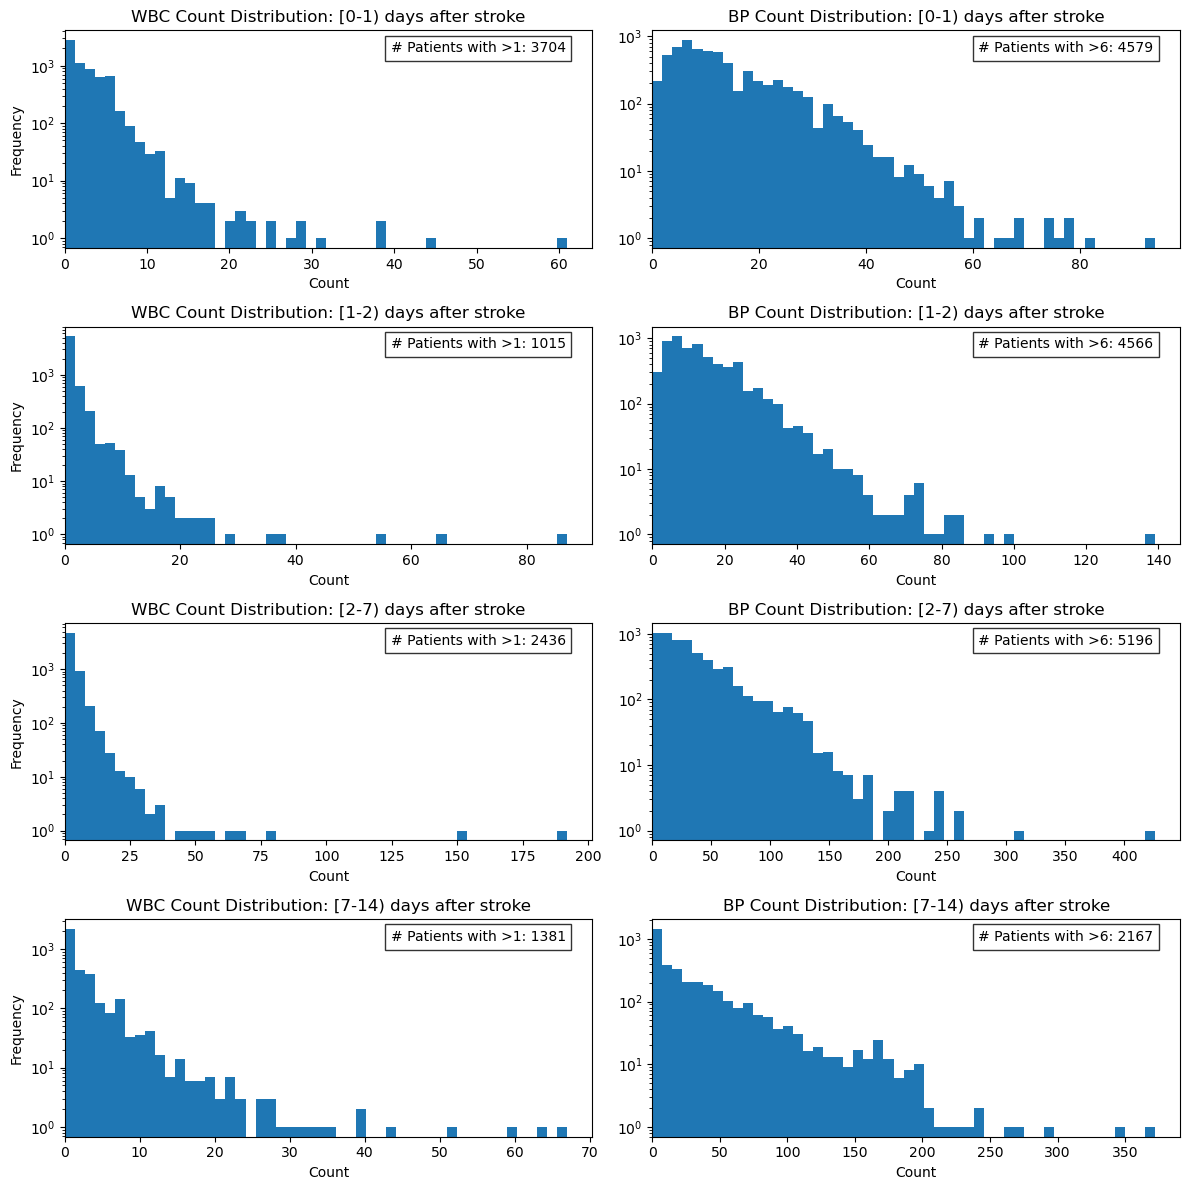

In [109]:
df_lb = dataframes['lab_result_cm']
all_loinc_codes = blood_pressure_loinc_codes+wbc_loinc_codes+heart_rate_loinc_codes
# Filter lab results for these LOINC codes
df_lb = df_lb[df_lb['LAB_LOINC'].isin(all_loinc_codes)]

# Merge lab results with diagnosis data to get stroke dates
df_lb_with_dx = pd.merge(df_lb, df_dx[['PATID', 'DX_DATE']], on='PATID', how='inner')

# Convert dates to datetime format if they aren't already
df_lb_with_dx['LAB_ORDER_DATE'] = pd.to_datetime(df_lb_with_dx['LAB_ORDER_DATE'])
df_lb_with_dx['DX_DATE'] = pd.to_datetime(df_lb_with_dx['DX_DATE'])

# Calculate the time difference between lab order and stroke diagnosis
df_lb_with_dx['days_after_stroke'] = (df_lb_with_dx['LAB_ORDER_DATE'] - df_lb_with_dx['DX_DATE']).dt.days

# Get BP data
df_bp = dataframes['vital'][['PATID','ENCOUNTERID','MEASURE_DATE','MEASURE_TIME','DIASTOLIC','SYSTOLIC','BP_POSITION']]

# Merge BP data with diagnosis data to get stroke dates
df_bp_with_dx = pd.merge(df_bp, df_dx[['PATID', 'DX_DATE']], on='PATID', how='inner')

# Convert dates to datetime format if they aren't already
df_bp_with_dx['MEASURE_DATE'] = pd.to_datetime(df_bp_with_dx['MEASURE_DATE'])
df_bp_with_dx['DX_DATE'] = pd.to_datetime(df_bp_with_dx['DX_DATE'])

# Calculate the time difference between BP measurement and stroke diagnosis
df_bp_with_dx['days_after_stroke'] = (df_bp_with_dx['MEASURE_DATE'] - df_bp_with_dx['DX_DATE']).dt.days

# Define time windows to analyze
time_windows = [1, 2, 7, 14]
time_windows_o = [0, 1, 2, 7]

import pylab as plt
# Create a figure with multiple rows for different time windows
fig, axes = plt.subplots(len(time_windows), 2, figsize=(12, 3*len(time_windows)))

for i, days in enumerate(time_windows):
    # Filter lab results for this time window
    df_lb_filtered = df_lb_with_dx[(df_lb_with_dx['days_after_stroke'] >= time_windows_o[i]) & 
                                  (df_lb_with_dx['days_after_stroke'] < days)]
    
    # Keep only the lab result columns
    df_lb_filtered = df_lb_filtered.drop(['DX_DATE', 'days_after_stroke'], axis=1)
    
    # Mark WBC tests
    df_lb_filtered['is_wbc'] = df_lb_filtered['LAB_LOINC'].isin(wbc_loinc_codes)
    
    # Count labs per patient
    patient_lab_counts = df_lb_filtered.groupby('PATID').agg({
        'is_wbc': 'sum',
    }).rename(columns={
        'is_wbc': 'wbc_count',
    })
    
    # Filter BP measurements for this time window
    df_bp_filtered = df_bp_with_dx[(df_bp_with_dx['days_after_stroke'] >= time_windows_o[i]) & 
                                  (df_bp_with_dx['days_after_stroke'] < days)]
    
    # Keep only the BP result columns
    df_bp_filtered = df_bp_filtered.drop(['DX_DATE', 'days_after_stroke'], axis=1)
    df_bp_filtered = df_bp_filtered.dropna(subset=['DIASTOLIC','SYSTOLIC'])
    
    # Count BP measurements per patient
    patient_bp_counts = df_bp_filtered.groupby('PATID')[['ENCOUNTERID']].count().rename(columns={
        'ENCOUNTERID': 'bp_count',
    })
    
    # Merge the counts
    merged_counts = patient_lab_counts.merge(patient_bp_counts, on='PATID', how='outer').fillna(0)
    
    # Calculate number of patients with more than 3 measurements
    wbc_patients_gt = sum(merged_counts['wbc_count'] > 1)
    bp_patients_gt = sum(merged_counts['bp_count'] > 6)
    
    # WBC count histogram
    axes[i, 0].hist(merged_counts['wbc_count'], bins=50, log=True)
    axes[i, 0].set_title(f'WBC Count Distribution: [{time_windows_o[i]}-{days}) days after stroke')
    axes[i, 0].set_xlabel('Count')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].text(0.95, 0.95, f'# Patients with >1: {wbc_patients_gt}', 
                   transform=axes[i, 0].transAxes, ha='right', va='top', 
                   bbox=dict(facecolor='white', alpha=0.8))
    axes[i, 0].set_xlim(left=0)
    
    # BP count histogram
    axes[i, 1].hist(merged_counts['bp_count'], bins=50, log=True)
    axes[i, 1].set_title(f'BP Count Distribution: [{time_windows_o[i]}-{days}) days after stroke')
    axes[i, 1].set_xlabel('Count')
    axes[i, 1].text(0.95, 0.95, f'# Patients with >6: {bp_patients_gt}', 
                   transform=axes[i, 1].transAxes, ha='right', va='top',
                   bbox=dict(facecolor='white', alpha=0.8))
    axes[i, 1].set_xlim(left=0)
    
    print(f"Number of lab results within {time_windows_o[i]}-{days} days after stroke: {df_lb_filtered.shape[0]}")
    print(f"Number of BP measurements within {time_windows_o[i]}-{days} days after stroke: {df_bp_filtered.shape[0]}")

plt.tight_layout()

# Save the figure with 300 dpi as a JPG file
plt.savefig('stroke_measurements_distribution.jpg', dpi=300, format='jpg', bbox_inches='tight')

